In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob
import os

#Load the .csv file
folder = 'C:\\Users\\Ashle\\OneDrive\\Desktop\\Lab codes\\2025 data\\time controls' #ashleigh's computer
#folder = 'C:\\Users\\lab\\Documents\\src\\Ashleigh\\Data 2025\\time controls' #lab computer

#Read CSV file
files = glob.glob(os.path.join(folder, "2507* time control.csv"))
print("Files found:", files)

for file in files:
    data = pd.read_csv(file) #reads the file
    print(f"\n--- {os.path.basename(file)} ---")
    print(data)



Files found: ['C:\\Users\\Ashle\\OneDrive\\Desktop\\Lab codes\\2025 data\\time controls\\250716 time control.csv', 'C:\\Users\\Ashle\\OneDrive\\Desktop\\Lab codes\\2025 data\\time controls\\250717 time control.csv']

--- 250716 time control.csv ---
          Time     0 TI     1 TE   2 TTot      3 VT     4 Max
0    2662.6774  0.65803  3.47160  4.12963  0.148833  0.402292
1    2666.8070  0.69627  5.51572  6.21199  0.150091  0.409752
2    2673.0190  0.68389  2.57762  3.26151  0.167150  0.427220
3    2676.2805  0.69365  4.98781  5.68146  0.136941  0.344988
4    2681.9620  0.67878  3.84262  4.52140  0.150894  0.347563
..         ...      ...      ...      ...       ...       ...
744  5849.1213  0.55003  3.41218  3.96221  0.093452  0.290498
745  5853.0835  0.57591  2.02969  2.60560  0.091467  0.227959
746  5855.6891  0.55204  3.05642  3.60846  0.094514  0.308805
747  5859.2976  0.51849  2.98621  3.50470  0.079645  0.229157
748  5862.8023  0.53245  3.13293  3.66538  0.082546  0.244325

[749 r

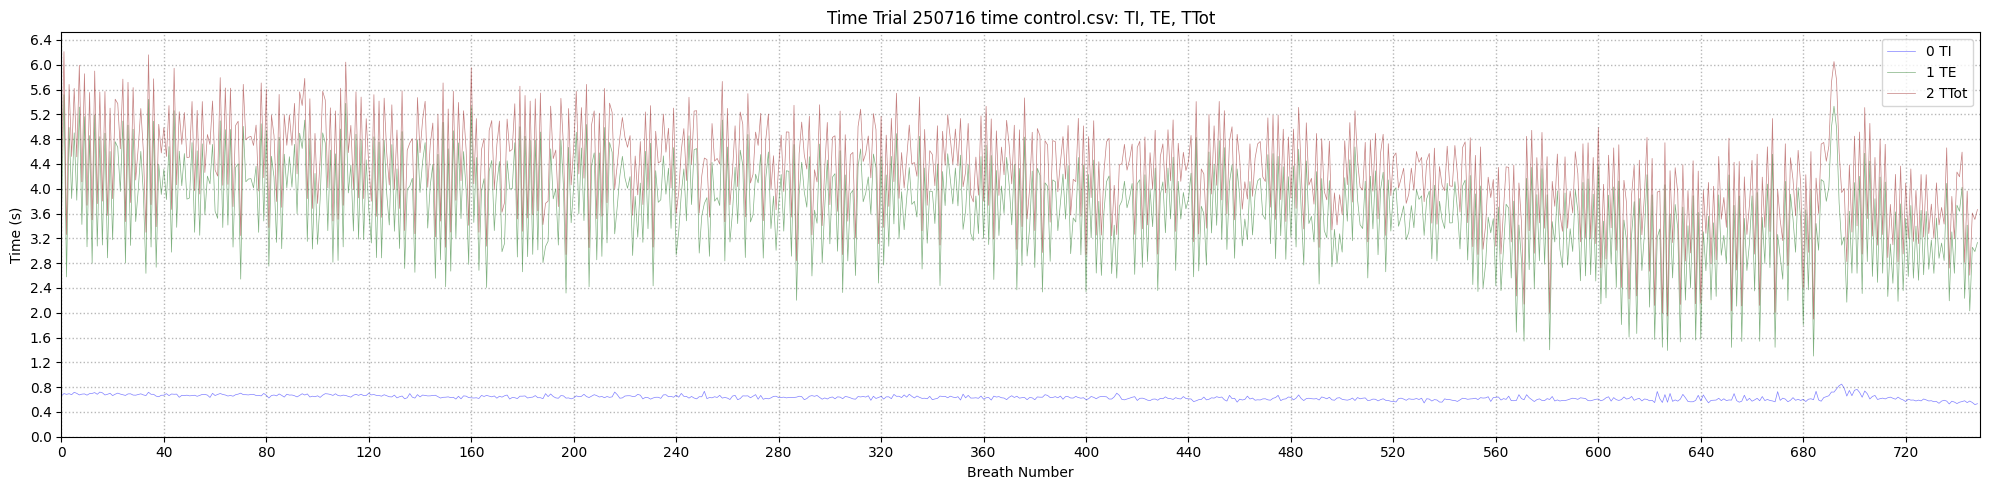

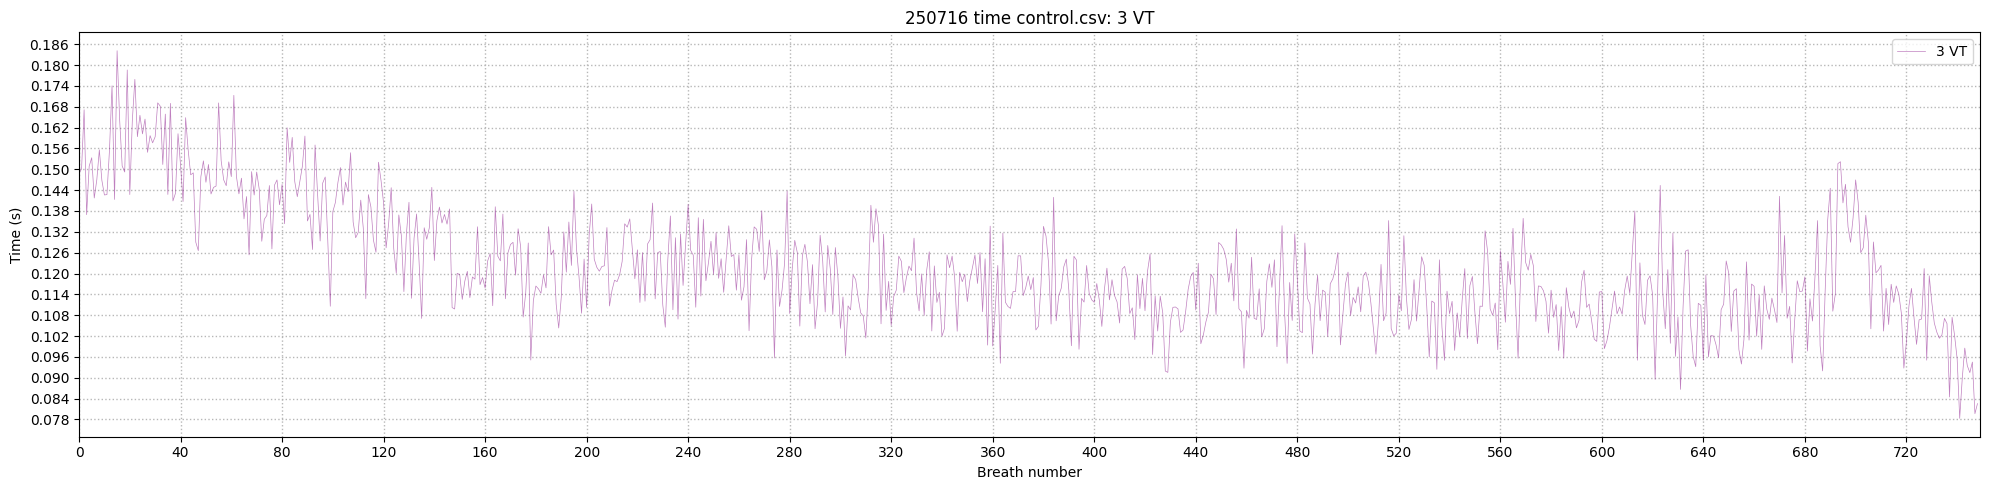

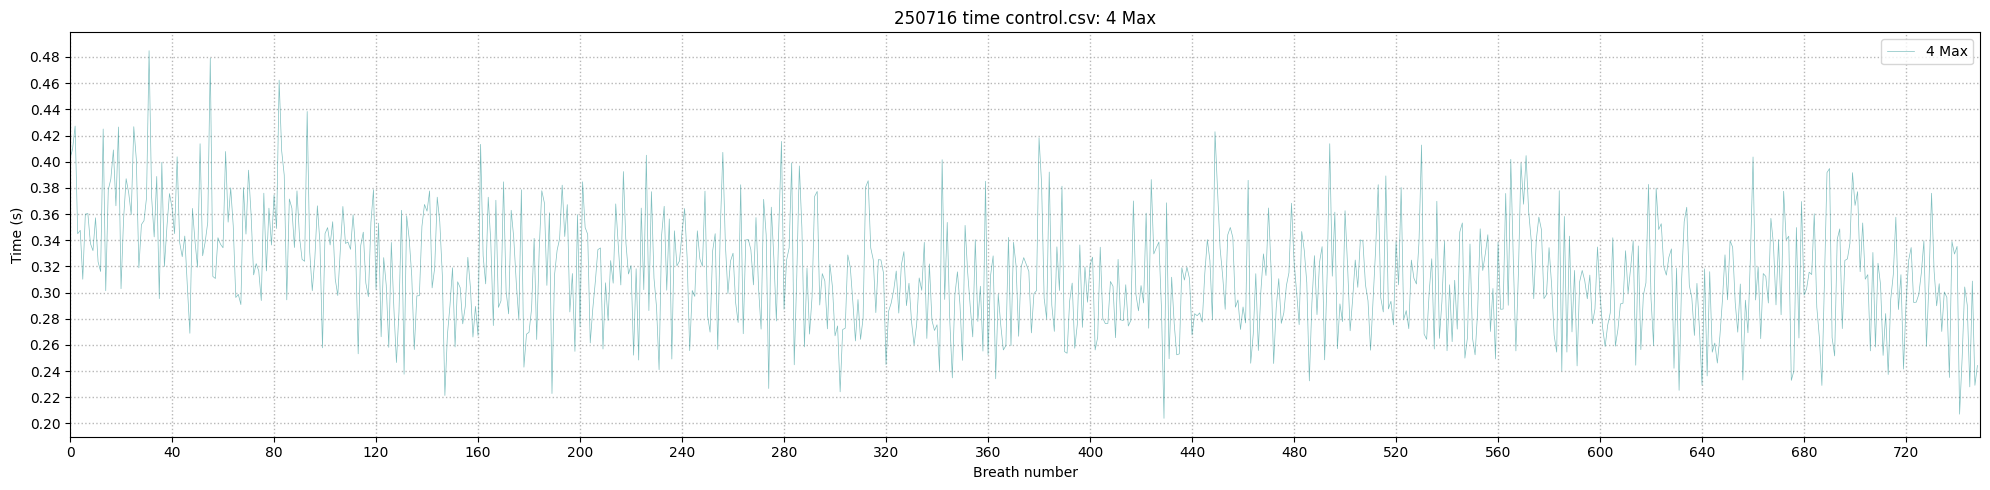

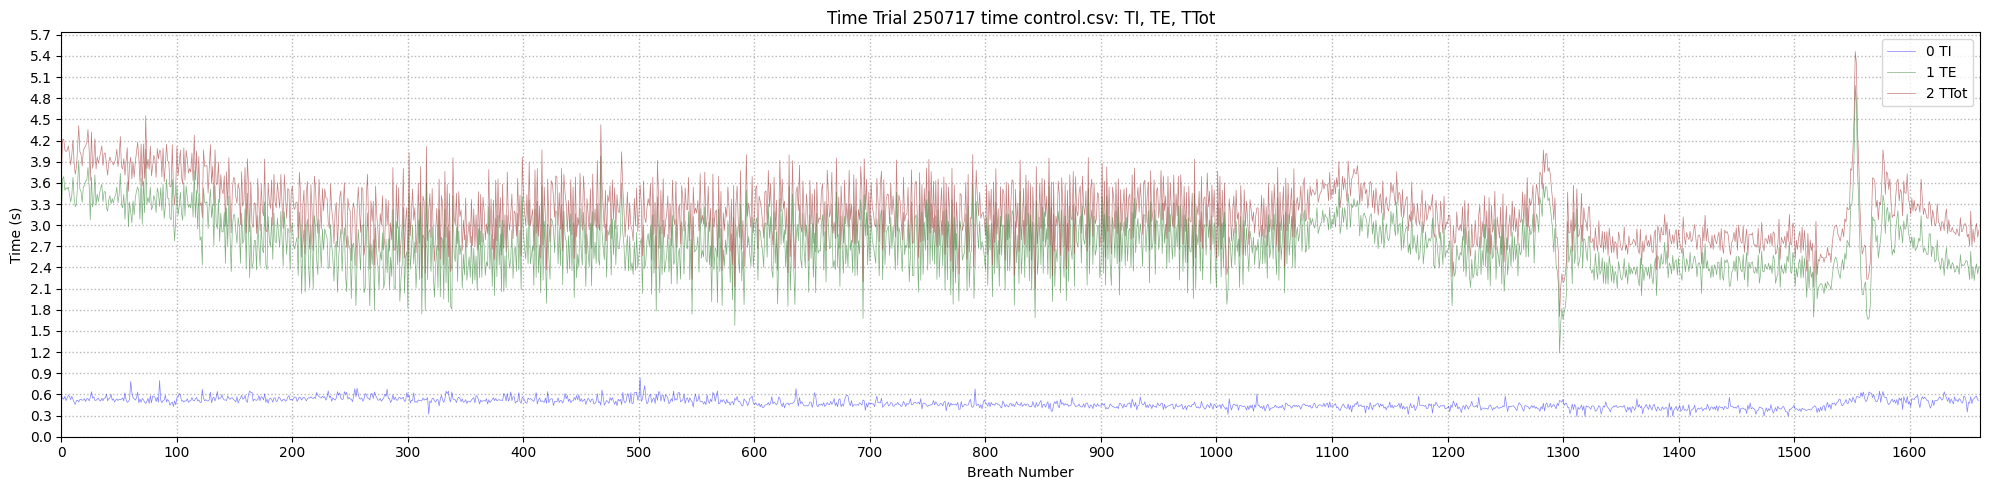

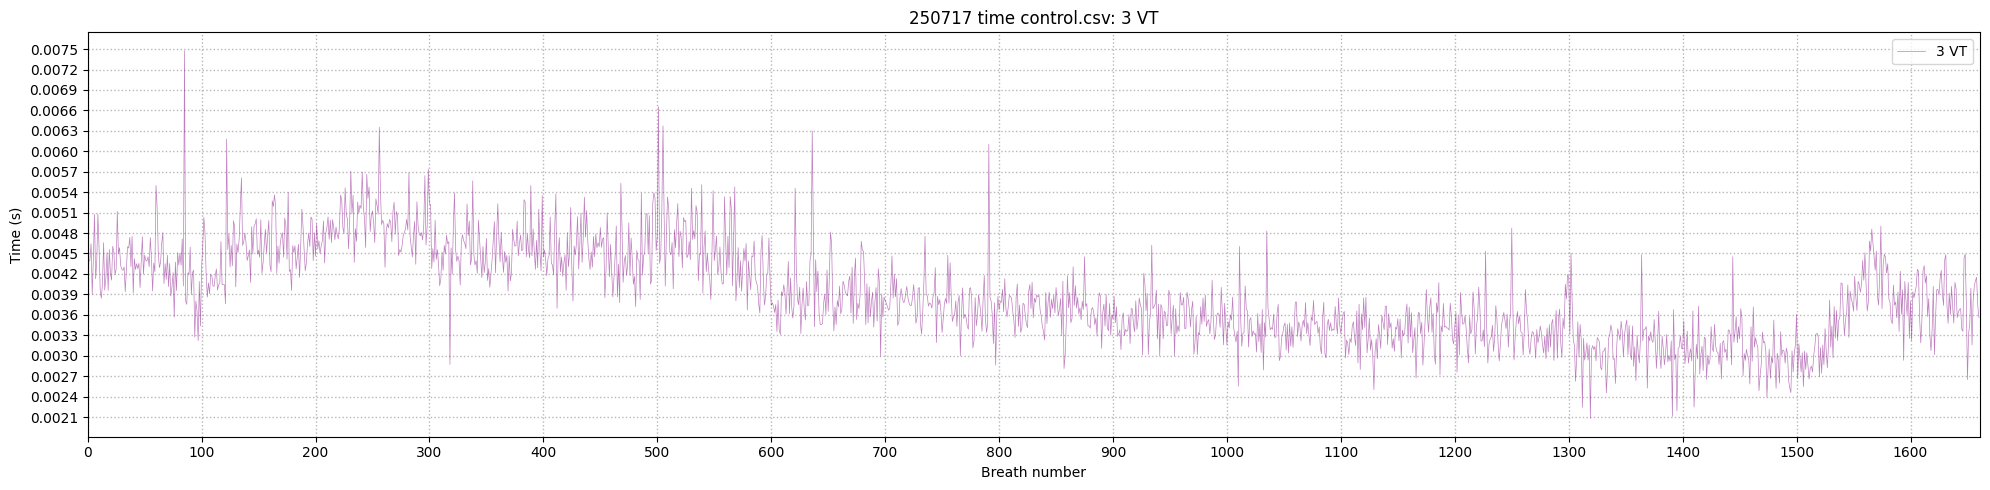

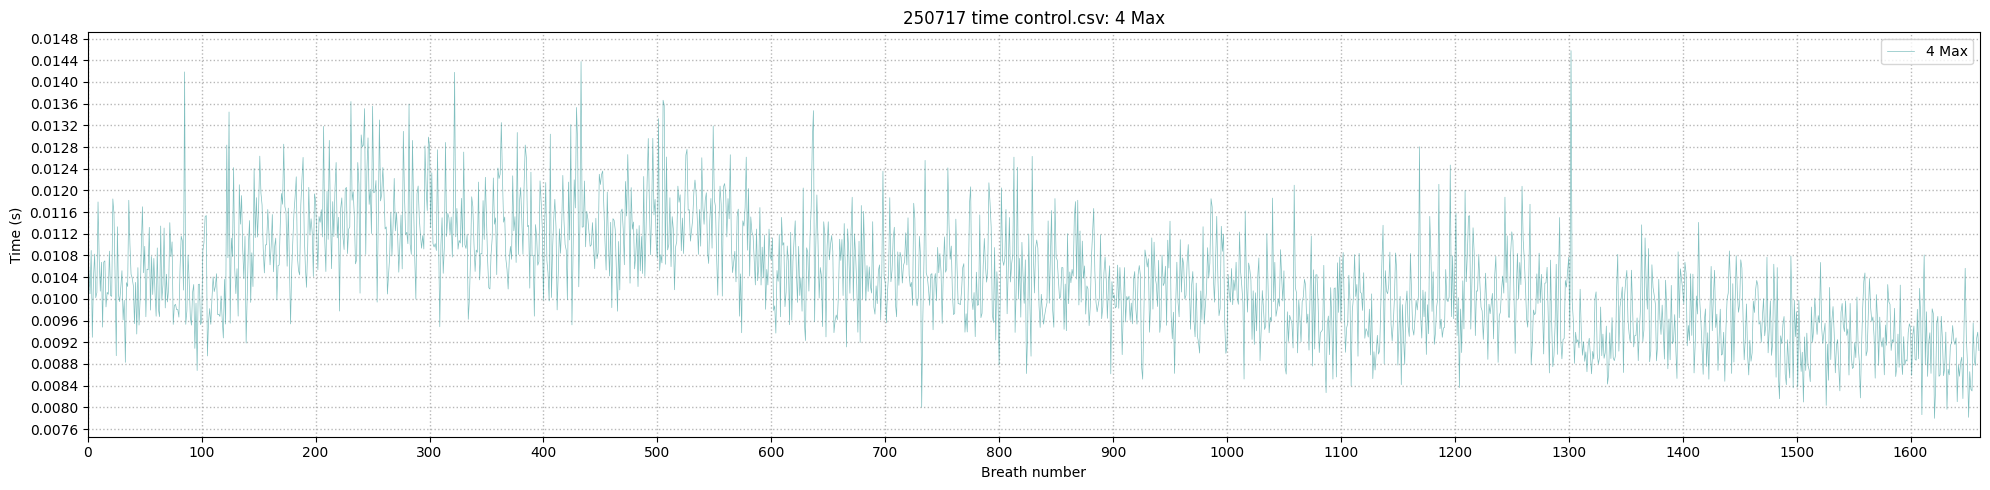

In [18]:
#should x axis be time or breath
colors_group1 = ['blue', 'darkgreen', 'darkred']      # for 0 TI, 1 TE, 2 TTot
colors_group2 = ['purple', 'teal']          # for 3 VT, 4 Max

# event_times = [900, 1800, 2700, 3600, 4500, 5400] #event times in seconds
# event_labels = ['15 mins','30 mins', '45 mins', '60 mins', '75 mins', '90 mins'] #event labels

for file in files:
    data = pd.read_csv(file)
    data['Time_shifted'] = data['Time'] - data['Time'].iloc[0] #shift the data so that time starts at 0
    group1 = ['0 TI', '1 TE', '2 TTot']
    group2 = ['3 VT', '4 Max']
    
    xlim = len(data)  # set x-axis limit variable
    x = range(xlim) #x axis range

    # event_indices = []
    # valid_labels = []
    # for t, label in zip(event_times, event_labels):
    #     if t <= data['Time_shifted'].iloc[-1]:  # only include events that exist
    #         idx = (np.abs(data['Time_shifted'] - t)).idxmin()
    #         event_indices.append(idx)
    #         valid_labels.append(label)

    plt.figure(figsize=(20, 5)) #figure size
    for var, color in zip(group1, colors_group1):
        plt.plot(x, data[var], label=var, linewidth=0.5, alpha=0.5, color=color)
        # coeffs = np.polyfit(x, data[var], 1) #linear fit trend line
        # trend = np.poly1d(coeffs)
        # plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color = color) #plot linear fit
    
    # for idx, label in zip(event_indices, event_labels):
    #     plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=1)
    #     y_min, y_max = plt.ylim()
    #     y_text = y_min - 0.3 * (y_max - y_min)  # move time marker down below x-axis
    #     plt.text(
    #         x=idx, 
    #         y=y_text,  # slightly below bottom
    #         s=label,
    #         rotation=90,
    #         verticalalignment='bottom',
    #         horizontalalignment='center',
    #         fontsize=10,
    #         color='black'
    #     )


    plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)  # style
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.yaxis.set_major_locator(plt.MaxNLocator(20))
    plt.xlim([0,xlim]) # set x-axis limit    
    plt.ylim(0, max(data[group1].max())*1.05)  # set y-axis limit
    plt.xlabel('Breath Number')
    plt.ylabel('Time (s)')  # all variables are in seconds
    plt.title(f'Time Trial {os.path.basename(file)}: TI, TE, TTot')
    plt.legend() 
    plt.tight_layout()
    plt.show()



    for var, color in zip(group2, colors_group2):
        plt.figure(figsize=(20, 5)) #figure size
        plt.plot(x, data[var], label=var, linewidth=0.5, alpha=0.5, color = color)
        # coeffs = np.polyfit(x, data[var], 1) #linear fit trend line
        # trend = np.poly1d(coeffs)
        # plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color = color) #plot linear fit
        
        # for idx, label in zip(event_indices, event_labels):
        #     plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=1)
        #     y_min, y_max = plt.ylim()
        #     y_text = y_min - 0.3 * (y_max - y_min)  # move time marker down below x-axis
        #     plt.text(
        #         x=idx,
        #         y=y_text,
        #         s=label,
        #         rotation=90,
        #         verticalalignment='bottom',
        #         horizontalalignment='center',
        #         fontsize=10,
        #         color='black'
        #     )
        plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)  # style
        ax = plt.gca()
        ax.xaxis.set_major_locator(plt.MaxNLocator(20))
        ax.yaxis.set_major_locator(plt.MaxNLocator(20))
        plt.xlim([0,xlim]) # set x-axis limit
        plt.title(f'{os.path.basename(file)}: {var}')
        plt.xlabel('Breath number')
        plt.ylabel('Time (s)')  # all variables are in seconds
        plt.legend() 
        plt.tight_layout()
        plt.show()

Normalized Mean % Change from Baseline:

0 TI: -7.43% change from baseline
1 TE: -12.61% change from baseline
2 TTot: -11.88% change from baseline
3 VT: -21.90% change from baseline
4 Max: -12.97% change from baseline


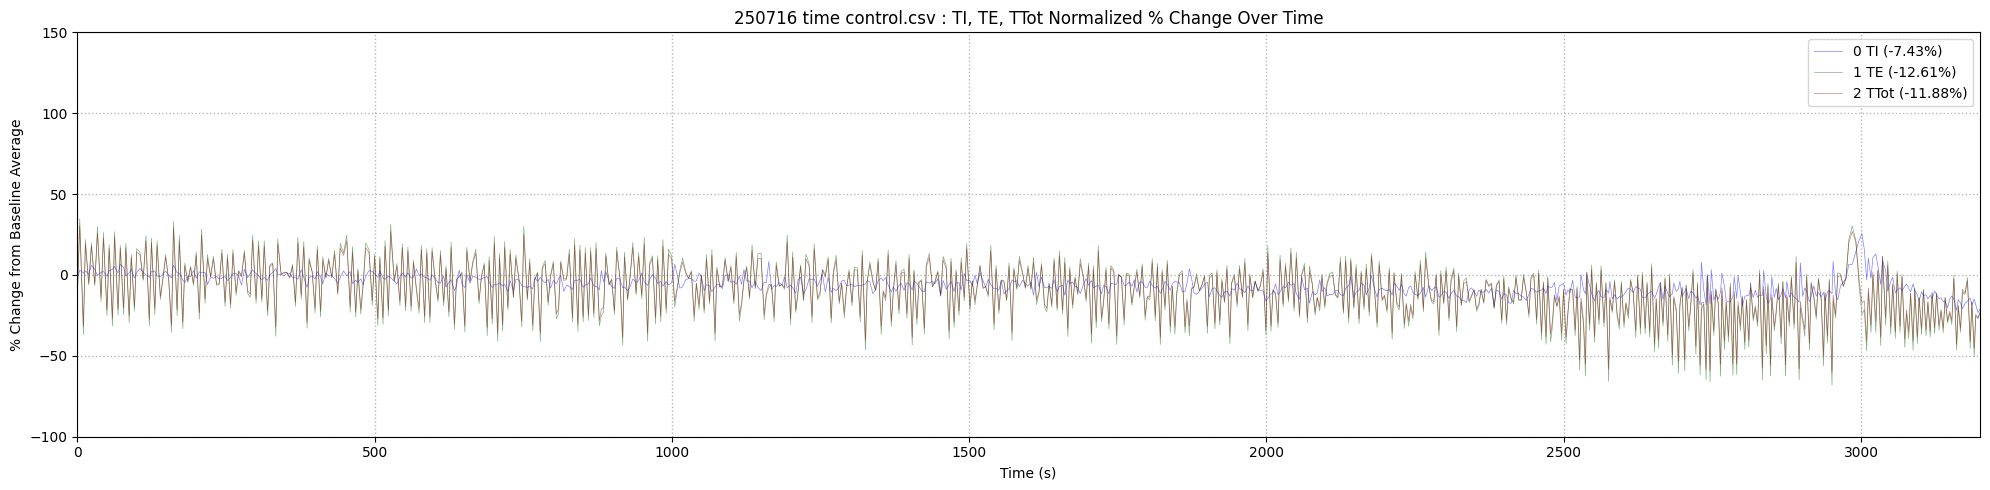

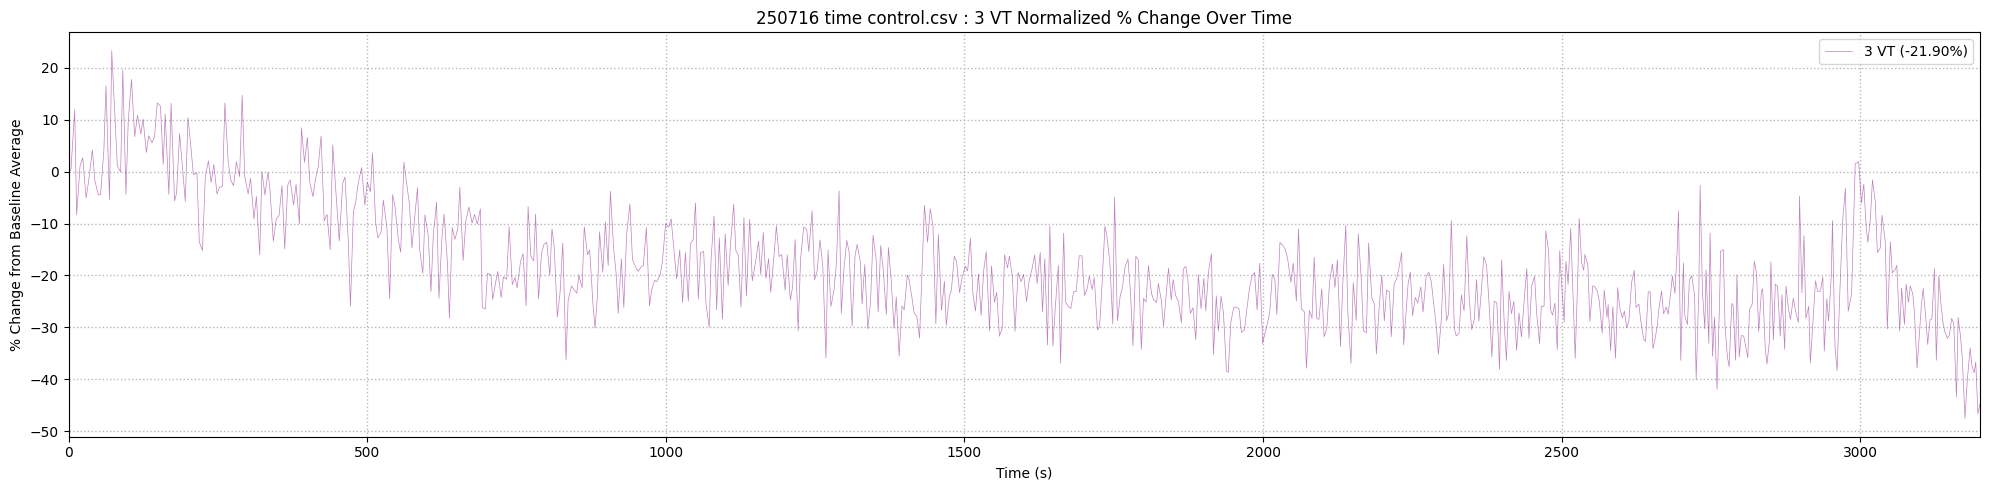

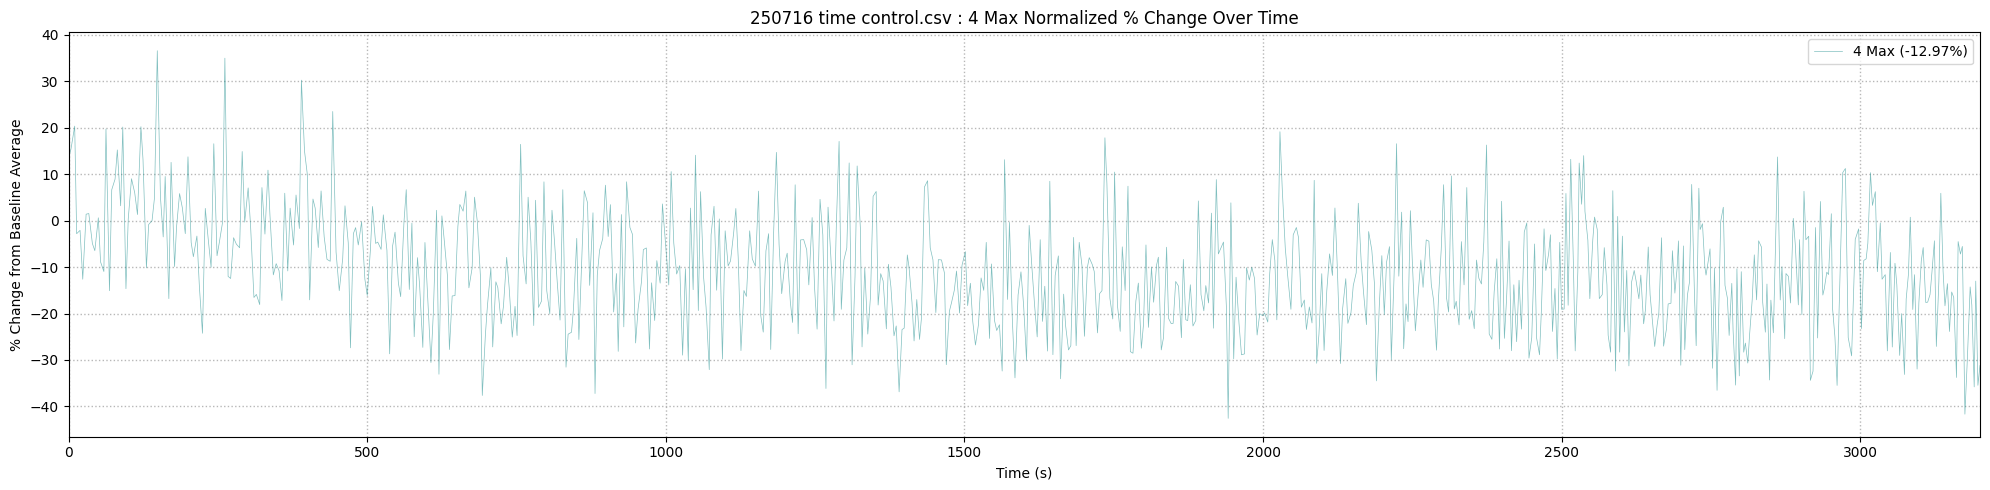

Normalized Mean % Change from Baseline:

0 TI: -11.12% change from baseline
1 TE: -21.12% change from baseline
2 TTot: -19.76% change from baseline
3 VT: -10.66% change from baseline
4 Max: 0.43% change from baseline


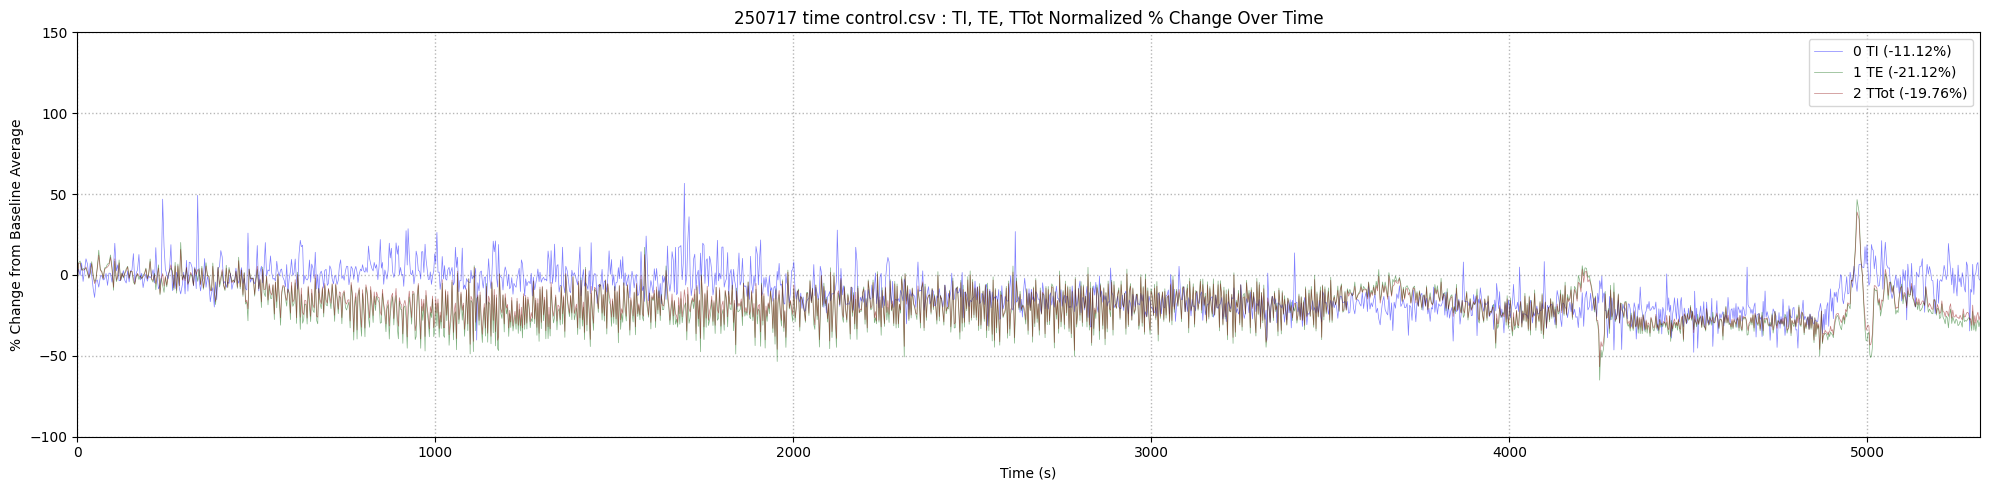

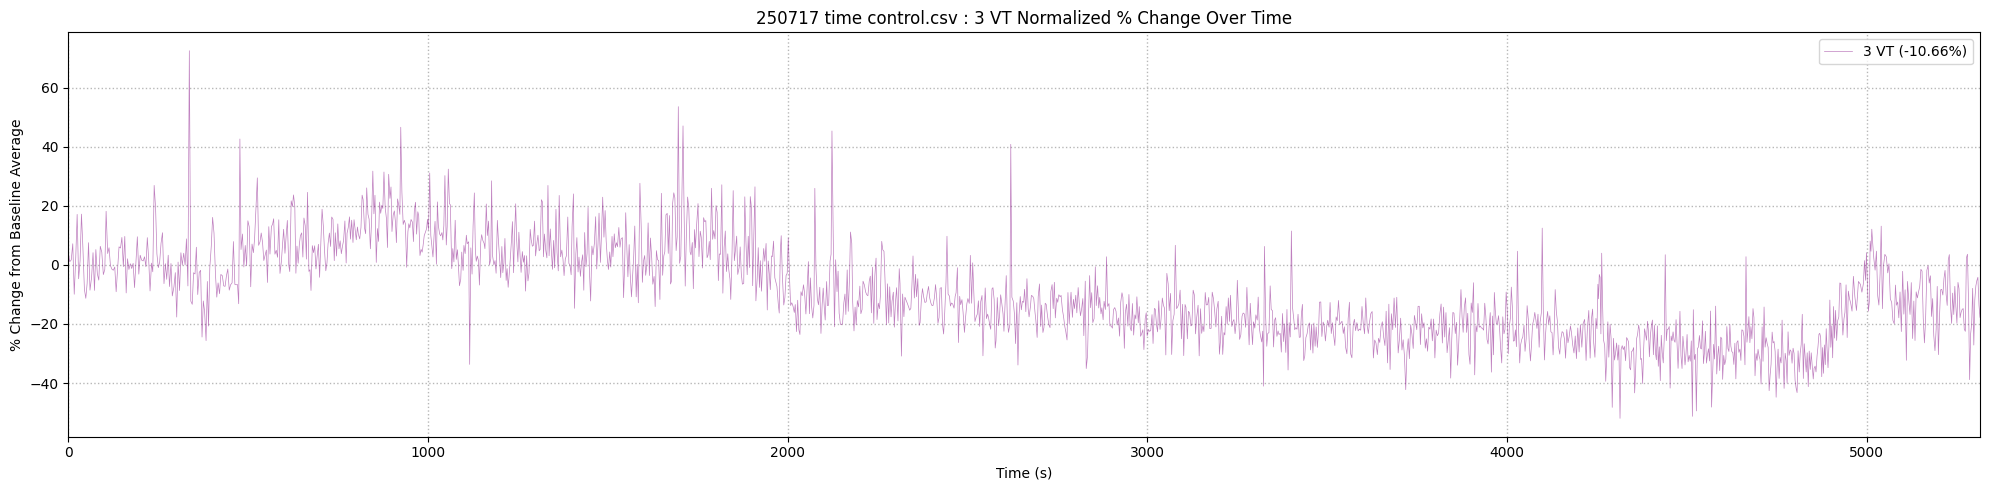

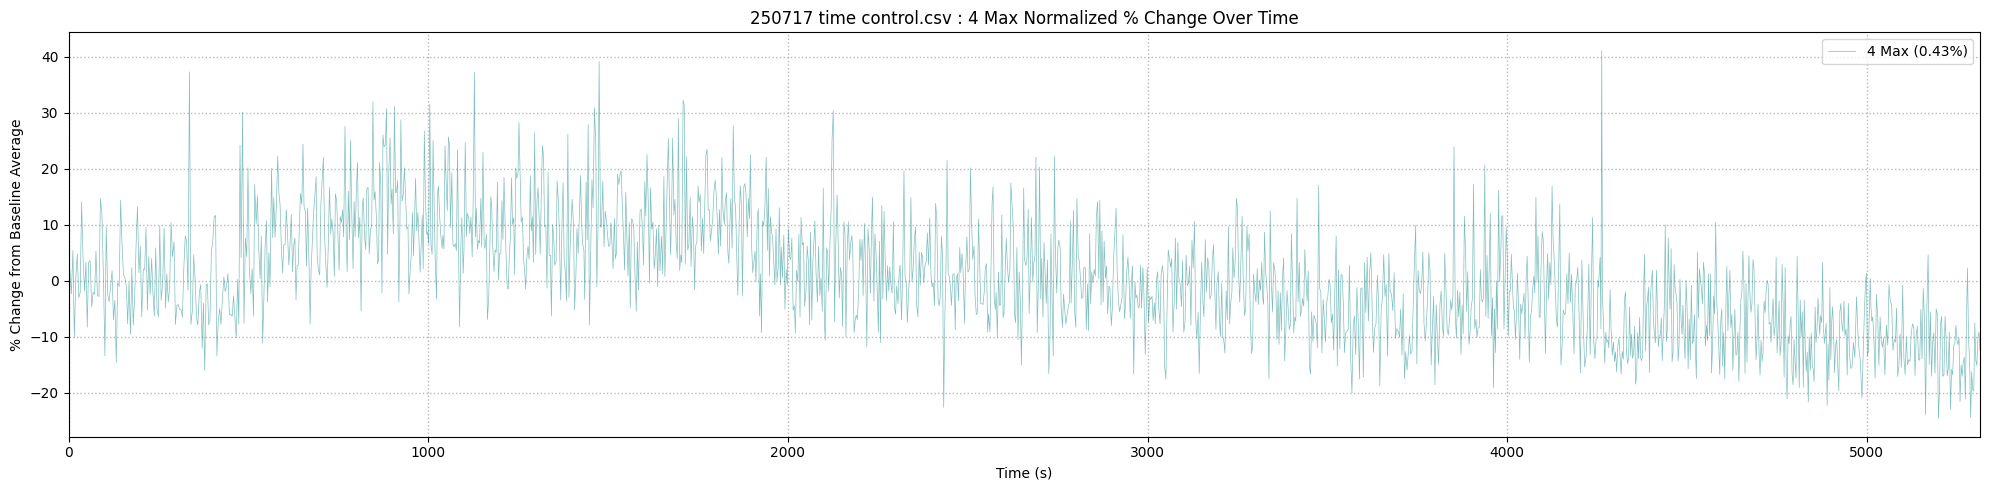

In [24]:
#Percent change from baseline (first 100 breaths) (normalized) for all variables
colors_group1 = ['blue', 'darkgreen', 'darkred']      # for 0 TI, 1 TE, 2 TTot
colors_group2 = ['purple', 'teal']          # for 3 VT, 4 Max
# event_times = [900, 1800, 2700, 3600, 4500, 5400] #event times in seconds
# event_labels = ['15 mins','30 mins', '45 mins', '60 mins', '75 mins', '90 mins'] #event labels


for file in files:
    
    data = pd.read_csv(file)
    xlim = len(data)  # set x-axis limit variable
    baseline_range = (0, 100) # breaths 0-100 is baseline, didn't include breats close to drug administration
    response_range = (101, xlim) # breaths 101-800 is post-drug

    data['Time_shifted'] = data['Time'] - data['Time'].iloc[0]  # shift time so first breath is at 0

    normalized_data = data.copy()
    for var in group1 + group2:
        baseline_mean = data[var].iloc[baseline_range[0]:baseline_range[1]].mean()
        # Normalize so baseline = 0% (percent change)
        normalized_data[var] = ((data[var] - baseline_mean) / baseline_mean) * 100

    percent_changes = {}
    for var in group1 + group2:
        postdrug_mean = normalized_data[var].iloc[response_range[0]:response_range[1]].mean()
        percent_changes[var] = postdrug_mean

    #print out the percent changes
    print("Normalized Mean % Change from Baseline:\n")
    for var, change in percent_changes.items():
        print(f"{var}: {change:.2f}% change from baseline")

    # Determine which event times exist in the experiment
    # event_indices = []
    # valid_labels = []
    # for t, label in zip(event_times, event_labels):
    #     if t <= data['Time_shifted'].iloc[-1]:  # only include events that exist
    #         idx = (np.abs(data['Time_shifted'] - t)).idxmin()
    #         event_indices.append(idx)
    #         valid_labels.append(label)

    #plot ti, te, ttot together
    x = data['Time_shifted']  # use shifted time as x-axis
    plt.figure(figsize=(20, 5))
    for var, color in zip(group1, colors_group1):        
        plt.plot(x, normalized_data[var], label=f"{var} ({percent_changes[var]:.2f}%)", color = color, linewidth=0.5, alpha=0.5)
        # coeffs = np.polyfit(x, normalized_data[var], 1) #linear fit trend line
        # trend = np.poly1d(coeffs)
        # plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color = color) #plot linear fit

    # Add vertical lines with labels below plot
    # for idx, label in zip(event_indices, valid_labels):
    #     plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=0.7)
    #     plt.text(x=idx, y=-0.1, s=label,rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=10, color='black', transform=plt.gca().get_xaxis_transform())
    plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
    plt.xlim([0, data['Time_shifted'].iloc[-1]]) # set x-axis limit to max time
    plt.ylim(-100, 150)
    plt.xlabel('Time (s)')
    plt.ylabel('% Change from Baseline Average')
    plt.title(f'{os.path.basename(file)} : TI, TE, TTot Normalized % Change Over Time')
    plt.legend()
    plt.tight_layout()
    plt.show()

    #plot vt and max separately
    for var, color in zip(group2, colors_group2):        
        plt.figure(figsize=(20, 5))
        plt.plot(x, normalized_data[var], label=f"{var} ({percent_changes[var]:.2f}%)", color = color, linewidth=0.5, alpha=0.5)
        # coeffs = np.polyfit(x, normalized_data[var], 1) #linear fit trend line
        # trend = np.poly1d(coeffs)
        # plt.plot(x, trend(x), linestyle='--', alpha=0.7, label=f'{var} trend', color = color) #plot linear fit

        # Add vertical lines with labels below plot
        # for idx, label in zip(event_indices, valid_labels):
        #     plt.axvline(x=idx, color='black', linestyle=':', linewidth=1, alpha=0.7)
        #     plt.text( x=idx, y=-102,s=label, rotation=90,verticalalignment='bottom',horizontalalignment='center',fontsize=10,color='black')

        plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.9)
        plt.xlim([0, data['Time_shifted'].iloc[-1]]) # set x-axis limit to max time   
        plt.xlabel('Time (s)')
        plt.ylabel('% Change from Baseline Average')
        plt.title(f'{os.path.basename(file)} : {var} Normalized % Change Over Time')
        plt.legend()
        plt.tight_layout()
        plt.show()
